In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras import Model, layers
from tensorflow.keras.models import load_model, model_from_json

In [3]:
import PIL

In [4]:
input_path = "/Users/cwbenton/STAT-4140/datasets/alien_vs_predator_thumbnails/data/"

## Create Data Generators

In [5]:
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    input_path + 'train',
    batch_size=32,
    class_mode='binary',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    input_path + 'validation',
    shuffle=False,
    class_mode='binary',
    target_size=(224,224))

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:

(694//32)

21

## Build the model

In [7]:
conv_base = InceptionV3(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 8s 0us/step


In [8]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [9]:
#model.summary()

In [10]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=694 // 32, 
                              epochs=3,
                              validation_data=validation_generator,
                              validation_steps=5 
                             )

/var/folders/gy/_22s087n05x34qr96kx8c9380000gn/T/ipykernel_6642/651057196.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/3
21/21 [==============================] - 34s 2s/step - loss: 0.3874 - accuracy: 0.8142 - val_loss: 0.2007 - val_accuracy: 0.9187
Epoch 2/3
21/21 [==============================] - 31s 1s/step - loss: 0.1717 - accuracy: 0.9305 - val_loss: 0.2069 - val_accuracy: 0.9062
Epoch 3/3
21/21 [==============================] - 31s 1s/step - loss: 0.1685 - accuracy: 0.9215 - val_loss: 0.1702 - val_accuracy: 0.9438


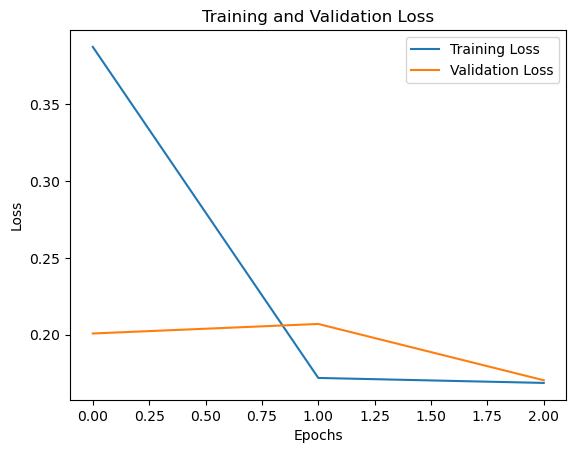

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

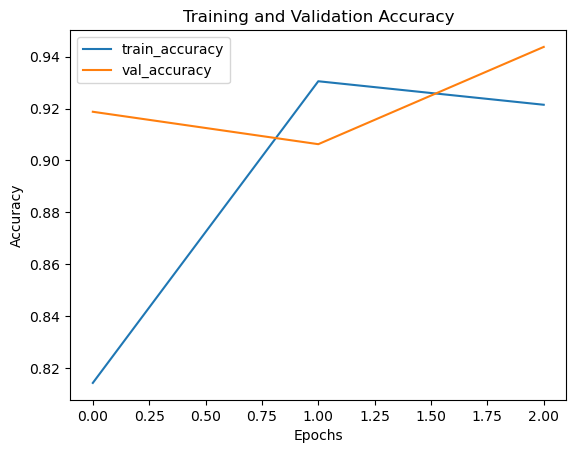

In [13]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()